In [1]:
from riotwatcher import LolWatcher, ApiError
import pandas as pd
api_key = 'RGAPI-a4de2f58-c735-4172-a0fc-f8e553c47bc0'
watcher = LolWatcher(api_key)
my_region = 'na1'
string_ID = 'HULKSMASH1337'
lol_tyler_1 = watcher.summoner.by_name(my_region, string_ID)
print(lol_tyler_1)

{'id': 'wzoROkOGV256lDuraz1SmF44aWZA23P_2xxNQqGxg0mZLqpn', 'accountId': 'LmXEidbyDIZ39ZzRRAngA7gA6wcxVN1fQEX1PwvyLq2ELFi3vP2ka_4N', 'puuid': 'lZRdO2wVxiR0YDg6ElcZD4uhXHhJNN49pCwxPLIHlQgo0pBJ8_TArbJaTkNp6NMKTLO8cPKPmhf1lQ', 'name': 'HULKSMASH1337', 'profileIconId': 3546, 'revisionDate': 1615616858000, 'summonerLevel': 217}


In [2]:
my_matches = watcher.match.matchlist_by_account(my_region,
                                                lol_tyler_1['accountId'])

In [3]:
count =0;                                                                       
for matchData in my_matches['matches']:
        count = count +1

In [4]:
participants =[]
alldata = {}
summoners = pd.DataFrame
counter = 0
for allMatch in range(count-1):
    last_match = my_matches['matches'][allMatch]
    match_detail = watcher.match.by_id(my_region, last_match['gameId'])
    find_tyler = match_detail['participants']
    for names in match_detail['participantIdentities']:                     
        rowSum = {}                                                         
        rowSum['Game #'] = allMatch                                         
        rowSum['Participant ID']= names['participantId']                    
        rowSum['Summoner Name'] = names['player']['summonerName']
        if names['player']['summonerName'] == string_ID:
            summoner_ID = rowSum['Participant ID']
            for row in find_tyler:
                stats_row = row['stats']
                if stats_row['participantId'] == summoner_ID:
                    instance_df = pd.DataFrame
                    summoner_stats ={}
                    #summoner_stats['outcome'] = stats_row['win']
                    if stats_row['win'] == True:
                        summoner_stats['outcome'] = 1
                    else:
                        summoner_stats['outcome'] = 0
                    summoner_stats['kills'] = stats_row['kills']
                    summoner_stats['deaths'] = stats_row['deaths']
                    summoner_stats['assists'] = stats_row['assists']
                    summoner_stats['totalDamageDealt'] = stats_row['totalDamageDealt']
                    summoner_stats['damageDealtToObjectives'] = stats_row['damageDealtToObjectives']
                    summoner_stats['totalDamageDealtToChampions'] = stats_row['totalDamageDealtToChampions']
                    summoner_stats['goldEarned'] = stats_row['goldEarned']
                    summoner_stats['totalMinionsKilled'] = stats_row['totalMinionsKilled']
                    #final_data =  pd.DataFrame(summoner_stats, index=[counter])
                    alldata[counter] = summoner_stats
                    #summoners = summoners.append(summoner_stats, ignore_index=True)
                    counter = counter +1
                    #instance_df = pd.DataFrame.from_dict(summoner_stats,orient='index',
                    #                                    columns=['outcome', 'kills', 'deaths', 'assists',
                    #                                            'totalDamageDealt', 'damageDealtToObjectives',
                    #                                             'goldEarned', 'totalMinionsKilled'])
                    
                
            
                                                                    
# #         part_row['Game #'] = allMatch                                           
#         #part_row['champion'] = row['championId']                                
#          part_row['statsData'] = row['stats']        
#          print(part_row)
# #         participants.append(part_row)                                           
# #         df = pd.DataFrame(participants)                                         
# #         summoners = []                                                            
    #data = dict(zip(allMatch,
                    #np.random.randint(10, size=5)))
    #match_pandas['Game #'] = [allMatch]
    #match_pandas['champion'] = row['championId']
    #match_pandas['win'] = row['stats']['win']
    #if allMatch == 1:
    #    print(match_detail['stats'])

In [5]:
data_transformed_df = pd.DataFrame.from_dict(alldata).T

In [6]:
data_transformed_df.head()

,outcome,kills,deaths,assists,totalDamageDealt,damageDealtToObjectives,totalDamageDealtToChampions,goldEarned,totalMinionsKilled
0,0,0,7,0,36840,2144,5221,3596,74
1,0,4,6,4,85930,2511,11753,9608,132
2,0,1,10,16,28367,879,9674,8296,37
3,0,2,7,4,72468,2375,13301,7106,109
4,0,2,6,1,86829,4255,7367,8089,164


In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import numpy as np
X = data_transformed_df[['kills','deaths','assists','totalDamageDealt',
              'damageDealtToObjectives','totalDamageDealtToChampions','goldEarned','totalMinionsKilled']]
y = data_transformed_df['outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [8]:
from sklearn.metrics import classification_report
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)
y_prob = y_prob[:,1]
print(X_test)
print(classification_report(y_test, y_pred))

    kills  deaths  assists  totalDamageDealt  damageDealtToObjectives  \
5       4       6        6            104725                     2989   
89      2       5        5             97058                       94   
40      2       7        6            130222                    10175   
8       2       5        7            131963                    10794   
94      7       5        7             95775                    10163   
10      5       4        6            117156                    10468   
63      0       4        9            358289                     6568   
91      2       1        3             59935                     1375   
50      2       6        0             99291                      960   
68      5       7        4            128756                     9045   
83      1       0        3             61887                     5667   
12      3       4        0            118077                     3622   
17      3       8        3             95190       

Text(0.5, 1.0, 'HULKSMASH1337')

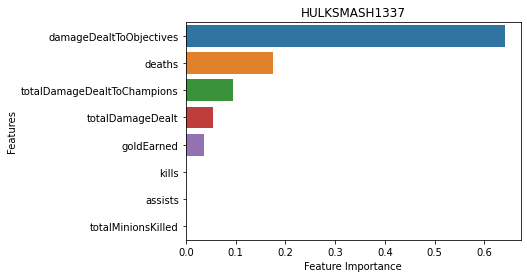

In [9]:
feature_imp = pd.Series(model.feature_importances_,index=X.columns).sort_values(ascending=False)
import seaborn as sns
import matplotlib.pyplot as plt
plot1 = plt.figure(1)
sns.barplot(x=feature_imp,y=feature_imp.index)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title(string_ID)

In [10]:
def display(y_pred,X_test):
    for g in range(len(y_pred)):
        win_prob = round(y_pred[g],2)
        away_team = X_test.reset_index().drop(columns = 'index').loc[g,'away_name']
        home_team = X_test.reset_index().drop(columns = 'index').loc[g,'home_name']
        print(f'The {away_team} have a probability of {win_prob} of beating the {home_team}.')

In [25]:
df2 = data_transformed_df.iloc[[0]]
DF1 = df2.drop(columns=['outcome'])

In [26]:
y_pred = model.predict(DF1)
if y_pred == 1:
    print('The outcome of the last game was a win')
else:
    print('The outcome of the last game was a loss')

The outcome of the last game was a loss


In [20]:
watcher.spectator.by_summoner(my_region,lol_tyler_1['id'])


{'gameId': 3839136108,
 'mapId': 11,
 'gameMode': 'CLASSIC',
 'gameType': 'MATCHED_GAME',
 'gameQueueConfigId': 420,
 'participants': [{'teamId': 100,
   'spell1Id': 4,
   'spell2Id': 12,
   'championId': 78,
   'profileIconId': 4568,
   'summonerName': 'Godlio',
   'bot': False,
   'summonerId': 'ubLPVZHaAKGK2aEiOqXDl9cMty1V8STD5CTMW0LLflmfOW8',
   'gameCustomizationObjects': [],
   'perks': {'perkIds': [8437, 8446, 8429, 8451, 8352, 8304, 5005, 5003, 5003],
    'perkStyle': 8400,
    'perkSubStyle': 8300}},
  {'teamId': 100,
   'spell1Id': 4,
   'spell2Id': 11,
   'championId': 56,
   'profileIconId': 4658,
   'summonerName': 'Acekill1314am',
   'bot': False,
   'summonerId': 'Tid9jsOMDKCoq94aMmgjOEJoiPuLzPXyQlKw9Zzpc0c4Q2A',
   'gameCustomizationObjects': [],
   'perks': {'perkIds': [8010, 8009, 9104, 8014, 8126, 8106, 5005, 5008, 5002],
    'perkStyle': 8000,
    'perkSubStyle': 8100}},
  {'teamId': 100,
   'spell1Id': 14,
   'spell2Id': 4,
   'championId': 412,
   'profileIconId':